<a href="https://colab.research.google.com/github/adnaneaabbar/stock-trading-system/blob/master/AutomatedTradingStrategyGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
AAPL = pd.read_csv("https://raw.githubusercontent.com/adnaneaabbar/stock-trading-system/master/data/AAPL.csv")
print(AAPL.head())
print(AAPL.tail())

         Date       Open       High    ...          Close  Adj Close     Volume
0  2006-10-02  10.728572  10.838572    ...      10.694285   9.258014  178159800
1  2006-10-03  10.635715  10.707143    ...      10.582857   9.161551  197677200
2  2006-10-04  10.585714  10.780000    ...      10.768572   9.322326  207270700
3  2006-10-05  10.647142  10.880000    ...      10.690000   9.254304  170970800
4  2006-10-06  10.631429  10.720000    ...      10.602858   9.178867  116739700

[5 rows x 7 columns]
            Date       Open       High    ...         Close  Adj Close    Volume
1318  2011-12-23  57.098572  57.655716    ...     57.618572  49.880241  67349800
1319  2011-12-27  57.585712  58.441429    ...     58.075714  50.275993  66269000
1320  2011-12-28  58.127144  58.321430    ...     57.520000  49.794914  57165500
1321  2011-12-29  57.628571  57.950001    ...     57.874287  50.101627  53994500
1322  2011-12-30  57.644287  58.040001    ...     57.857143  50.086784  44915500

[5 rows x 7

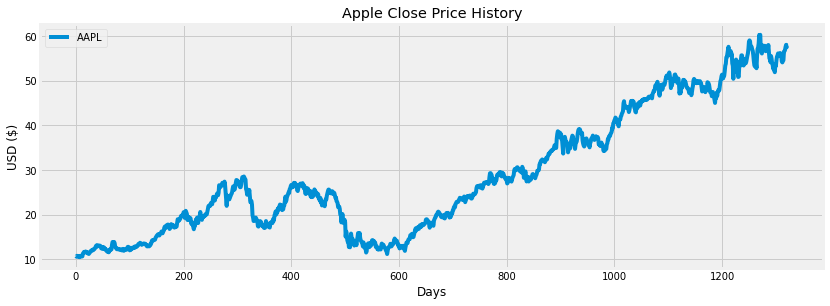

In [17]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Close'], label='AAPL')
plt.title('Apple Close Price History')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

In [0]:
SMA30 = pd.DataFrame()
SMA30['Close'] = AAPL['Close'].rolling(30, min_periods=1, center=False).mean()
SMA30

In [0]:
SMA100 = pd.DataFrame()
SMA100['Close'] = AAPL['Close'].rolling(100, min_periods=1, center=False).mean()
SMA100

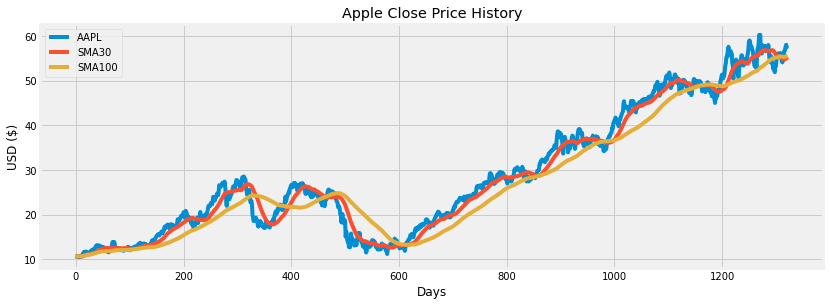

In [21]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Close'], label='AAPL')
plt.plot(SMA30['Close'], label="SMA30")
plt.plot(SMA100['Close'], label="SMA100")
plt.title('Apple Close Price History')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()

In [0]:
signals = pd.DataFrame(index=AAPL.index)
signals['signal'] = 0.0
signals['SMA30'] = SMA30['Close']
signals['SMA100'] = SMA100['Close']
signals['signal'][30:] = np.where(signals['SMA30'][30:] 
                                            > signals['SMA100'][30:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
signals

<Figure size 432x288 with 0 Axes>

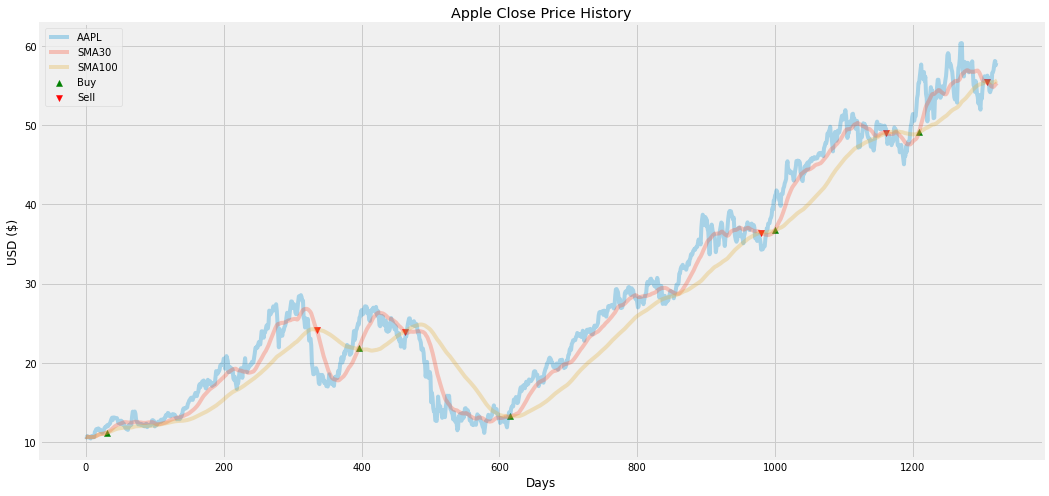

In [35]:
fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.plot(AAPL['Close'], label='AAPL',alpha=0.3)
plt.plot(signals['SMA30'], label="SMA30",alpha=0.3)
plt.plot(signals['SMA100'], label="SMA100",alpha=0.3)
plt.scatter(signals.loc[signals.positions == 1.0].index, signals.SMA30[signals.positions == 1.0], label="Buy", marker="^", color='green')
plt.scatter(signals.loc[signals.positions == -1.0].index, signals.SMA30[signals.positions == -1.0], label="Sell", marker="v", color='red')
plt.title('Apple Close Price History')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.legend(loc='upper left')
plt.show()
